# Community Mapping Demo
Author: Rebecca Vandewalle
    
This is a short demo for reading a set of text files and mapping counts on an interactive map.

In [1]:
# import needed libraries for running the notebook
# this cell must be run 1st for the other cells in this demo to work
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
import branca.colormap as cm
import os
import ipywidgets as widgets
from ipywidgets.embed import embed_data
import json
from bs4 import BeautifulSoup as bs

/tmp/ipykernel_197/3691977100.py:3: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


The first dataset is the Chicago dataset, showing information about communities within the city of Chicago. In this example, the base data file is a geojson file, which has the extension `.geojson`. The raw data is read with the `geopandas` library.

In [2]:
# read the geospatial data (import into a geodataframe) with the geopandas library
chicago = gpd.read_file('Chicago_Community.geojson')

We can investigate the base data by viewing attributes, plotting it, and viewing the first several lines of the database.

In [3]:
# get basic info about the chicago dataset
chicago.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   community   77 non-null     object  
 1   area        77 non-null     object  
 2   shape_area  77 non-null     object  
 3   perimeter   77 non-null     object  
 4   area_num_1  77 non-null     object  
 5   area_numbe  77 non-null     object  
 6   comarea_id  77 non-null     object  
 7   comarea     77 non-null     object  
 8   shape_len   77 non-null     object  
 9   geometry    77 non-null     geometry
dtypes: geometry(1), object(9)
memory usage: 6.1+ KB


<Axes: >

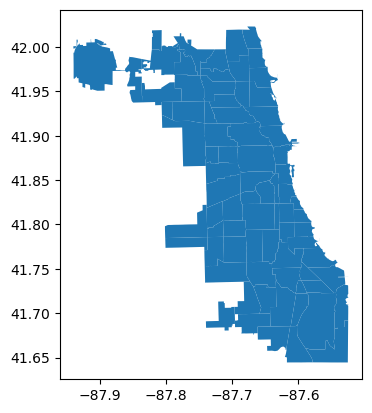

In [4]:
# plot the geospatial data
chicago.plot()

In [5]:
# look through the first several lines
chicago.head()

community area     shape_area perimeter area_num_1 area_numbe  \
0          DOUGLAS    0  46004621.1581         0         35         35   
1          OAKLAND    0  16913961.0408         0         36         36   
2      FULLER PARK    0  19916704.8692         0         37         37   
3  GRAND BOULEVARD    0  48492503.1554         0         38         38   
4          KENWOOD    0  29071741.9283         0         39         39   

  comarea_id comarea      shape_len  \
0          0       0  31027.0545098   
1          0       0  19565.5061533   
2          0       0  25339.0897503   
3          0       0  28196.8371573   
4          0       0  23325.1679062   

                                            geometry  
0  MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...  
1  MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...  
2  MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...  
3  MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...  
4  MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...

# Input data (Communities and counts)
For this demo, I've created a few text files with a row of community names and a count attribute. Each text file is named with the original community name.

In [6]:
# read in the text file (import into a dataframe) with the pandas library
douglas_txt = pd.read_csv('communities/DOUGLAS.txt')

In [7]:
# look through the first several lines
douglas_txt

community  count
0      OAKLAND     10
1  FULLER PARK      5
2      KENWOOD      5
3        OHARE     12
4    EDGEWATER      3
5  MORGAN PARK      6

In [8]:
# merge douglas data with chicago dataset
douglas_comm = chicago.merge(douglas_txt, how='left', on='community')
# Replace NaNs with 0 (community count is 0)
douglas_comm = douglas_comm.fillna(value=0)
# rename 'count' column to 'douglas'
douglas_comm = douglas_comm.rename(columns={"count": "douglas"})

In [9]:
# look through the first several lines of merged dataset
douglas_comm.head()

community area     shape_area perimeter area_num_1 area_numbe  \
0          DOUGLAS    0  46004621.1581         0         35         35   
1          OAKLAND    0  16913961.0408         0         36         36   
2      FULLER PARK    0  19916704.8692         0         37         37   
3  GRAND BOULEVARD    0  48492503.1554         0         38         38   
4          KENWOOD    0  29071741.9283         0         39         39   

  comarea_id comarea      shape_len  \
0          0       0  31027.0545098   
1          0       0  19565.5061533   
2          0       0  25339.0897503   
3          0       0  28196.8371573   
4          0       0  23325.1679062   

                                            geometry  douglas  
0  MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...      0.0  
1  MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...     10.0  
2  MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...      5.0  
3  MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...      0.0  
4  MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...      5.0

In [10]:
# check joined data (which communities have a douglas count value)
douglas_comm[douglas_comm['douglas'] > 0]

community area     shape_area perimeter area_num_1 area_numbe  \
1       OAKLAND    0  16913961.0408         0         36         36   
2   FULLER PARK    0  19916704.8692         0         37         37   
4       KENWOOD    0  29071741.9283         0         39         39   
73  MORGAN PARK    0  91877340.6988         0         75         75   
74        OHARE    0  371835607.687         0         76         76   
75    EDGEWATER    0  48449990.8397         0         77         77   

   comarea_id comarea      shape_len  \
1           0       0  19565.5061533   
2           0       0  25339.0897503   
4           0       0  23325.1679062   
73          0       0   46396.419362   
74          0       0   173625.98466   
75          0       0  31004.8309456   

                                             geometry  douglas  
1   MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...     10.0  
2   MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...      5.0  
4   MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...      5.0  
73  MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ...      6.0  
74  MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ...     12.0  
75  MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ...      3.0

# The Folium package
The `Folium` package is an easy way to create a map using Python. The mapping capability is based on the `Leaflet` package, originally designed for JavaScript.

In [11]:
# create the base map object
m = folium.Map([42, -87.5], zoom_start=10)

# create a linear colormap to display data
linear_cm = cm.linear.YlGnBu_09.scale(0, 20)

# add the community counts data to the map
folium.GeoJson(
    douglas_comm,
    style_function=lambda feature: {
        "fillColor": linear_cm(feature["properties"]["douglas"]),
        "fillOpacity": 0.9 
        if feature["properties"]["douglas"] > 0
        else 0.0,
        "color": "black",
        "weight": 1,
    },
    control=True).add_to(m)

# add the color scale to the map
m.add_child(linear_cm)

# add a tooltip layer view the counts on hover
tooltip = folium.GeoJsonTooltip(
    fields=["community", "douglas"],
    aliases=["Community:", "Migration from Douglas:"],
    localize=True,
    sticky=False,
    labels=True,
    max_width=800,
)

# add a geojson layer to view the tooltip
# make fill and stroke false because style is set in choropleth layer
g = folium.GeoJson(
    douglas_comm,
    style_function=lambda x: {
        "fillOpacity": 0.0,
        "stroke": False},
    tooltip=tooltip,
    control=False).add_to(m)

# add a layer control tool
folium.LayerControl().add_to(m)

# display the map
m

# Batch import & create an interactive map

The previous section contains a demo on how to add count features from a text file to an interactive web map. In this section, we'll use a script to add count features from multiple text files.

## Assumptions:
- All community counts are in text files within the `communities` folder
- The name of the text file is the source community of the count
- Communities listed within in the text file contain counts for the destination community of the community listed in the text file filename
- Community names match exactly between the textfile names and the community names in the geospatial file

## Data processing
First we can process all the community text files in the `communities` folder.

In [12]:
# Gather community names from files
# set the path to the communities directory (from within the current directory)
path = "./communities"
# get all filenames in the communities directory
community_list = os.listdir(path)
# get community names for only files that end in .txt
community_list = [x[:-4] for x in community_list if x[-4:] == '.txt']
print("Communities from file: ", community_list)


Communities from file:  ['DOUGLAS', 'EDISON PARK', 'KENWOOD']


In [13]:
# load chicago dataset (to get a clean version)
full_gdf = gpd.read_file('Chicago_Community.geojson')

Now we can create a geodataframe containing all the community counts from the text files.

In [14]:
# COMMUNITY LOOP

# Load communities in a loop and join with chicago dataset
for community_name in community_list:
    community_path = 'communities/'+community_name+'.txt'
    community_txt = pd.read_csv(community_path)
    
    # merge community data with chicago dataset
    full_gdf = full_gdf.merge(community_txt, how='left', on='community')
    # Replace NaNs with 0 (community count is 0)
    full_gdf = full_gdf.fillna(value=0)
    # rename 'count' column to community name
    full_gdf = full_gdf.rename(columns={"count": community_name.title()})
    
# END COMMUNITY LOOP

In [15]:
# Check full database
full_gdf.head()

community area     shape_area perimeter area_num_1 area_numbe  \
0          DOUGLAS    0  46004621.1581         0         35         35   
1          OAKLAND    0  16913961.0408         0         36         36   
2      FULLER PARK    0  19916704.8692         0         37         37   
3  GRAND BOULEVARD    0  48492503.1554         0         38         38   
4          KENWOOD    0  29071741.9283         0         39         39   

  comarea_id comarea      shape_len  \
0          0       0  31027.0545098   
1          0       0  19565.5061533   
2          0       0  25339.0897503   
3          0       0  28196.8371573   
4          0       0  23325.1679062   

                                            geometry  Douglas  Edison Park  \
0  MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...      0.0          0.0   
1  MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...     10.0          0.0   
2  MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...      5.0          2.0   
3  MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...      0.0          0.0   
4  MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...      5.0          5.0   

   Kenwood  
0      0.0  
1      1.0  
2      0.0  
3     10.0  
4      1.0

We can get the min and max values from the community counts to generate a range for coloring.

In [16]:
# Get the min and max values for the counts for all the loaded communities
count_min = int(full_gdf[[community_name.title() for community_name in community_list]].agg(['min']).min(axis=1).iloc[0])
count_max = int(full_gdf[[community_name.title() for community_name in community_list]].agg(['max']).max(axis=1).iloc[0])

## Mapping
Now we can create an interactive map. First we can create a function that creates a map for a given community.

In [17]:
# create a function to create community maps
def create_community_map_html(community_name, geodataframe, color_bar_min, color_bar_max):
        
    # create a linear colormap to display data
    linear_comm_cm = cm.linear.YlGnBu_09.scale(color_bar_min, color_bar_max)

    # Map output with Folium webmap
    # create the base map object
    m = folium.Map([42, -87.5], zoom_start=10, zoom_control="topleft")

    # Load the Map
    # Add the community counts data to the map
    folium.GeoJson(
    geodataframe,
    name=community_name,
    style_function=lambda feature: {
        "fillColor": linear_cm(feature["properties"][community_name]),
        "fillOpacity": 0.9 
        if feature["properties"][community_name] > 0
        else 0.0,
        "color": "black",
        "weight": 1,
    },
    control=True).add_to(m)

    # Add a tooltip layer view the counts on hover
    tooltip_string = "Migration from "+community_name+":"
    tooltip = folium.GeoJsonTooltip(
        fields=["community", community_name],
        aliases=["Community:", tooltip_string],
        localize=True,
        sticky=False,
        labels=True,
        max_width=800,
    )

    # Add a geojson layer to view the tooltip
    # Make fill and stroke false because style is set in choropleth layer
    g = folium.GeoJson(
        full_gdf,
        style_function=lambda x: {
            "fillOpacity": 0.0,
            "stroke": False},
        tooltip=tooltip,
        control=False).add_to(m)

    # Finish setting up Folium map
    # Add a map title
    title_text = "Community Counts for "+community_name
    title_html = f'<h1 style="align:center;z-index:100000;" >{title_text}</h1>'
    m.get_root().html.add_child(folium.Element(title_html))
    
    # Add the color scale to the map
    m.add_child(linear_comm_cm)

    # Add a layer control tool
    folium.LayerControl(position="topleft").add_to(m)
    
    return(m)

Now we can create a dictionary to hold maps for each community, and iterate through communities, creating a map for each community and storing it in an `Output` widget (the type of widget used for display).

In [18]:
# create a list to hold community  maps
out_widgets_list = []

# containing output widgets with maps for each community
for community_name in community_list:
    # create an output widget to display the map
    out = widgets.Output()
    m = create_community_map_html(community_name.title(), full_gdf, count_min, count_max)
    out.append_display_data(m)
    out_widgets_list.append(out)


Once we have created the map series we can view a community map using the community name (in title case) as a key.

In [19]:
# See an example map
out_widgets_list[0]

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<folium.folium.Map at 0x7f1c9c4d0400>'…

## Export the map to html
You can export the created map to an html file and then load the html file to view and interact with the exported map. Here we have additional code to view the final html file with a dropdown.

First we'll create a html template used to build the html file. The first section contains the start of the needed html code. Primarily, it includes the scripts needed for the widget dislay to be embedded. Then maps for each of the communities are added and finally the html closing tags are appended.

In [20]:
# create the start of the html template

html_template = '''
<html>
  <head>

    <title>Community Map</title>

    <!-- Load RequireJS, used by the IPywidgets for dependency management -->
    <script
      src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js"
      integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA="
      crossorigin="anonymous">
    </script>

    <!-- Load IPywidgets bundle for embedding. -->
    <script
      data-jupyter-widgets-cdn="https://unpkg.com/"
      data-jupyter-widgets-cdn-only
      src="https://cdn.jsdelivr.net/npm/@jupyter-widgets/html-manager@*/dist/embed-amd.js"
      crossorigin="anonymous">
    </script>

    <!-- The state of all the widget models on the page -->
    <script type="application/vnd.jupyter.widget-state+json">
      {manager_state}
    </script>
      <style id="main_style">
      </style>
  </head>

  <body>
<h1>Community Count Maps</h1>
    <body>
        <select id="target">
        <option value="">Select...</option>
'''

# add dropdown
for community_name in community_list:
    # format community id from name
    community_id = "".join(community_name.split())
    # add to selection dropdown
    html_template +=  "<option value="+community_id+">"+community_name.title()+"</option>"

# close selection dropdown
html_template += '''
<select>
'''

# add each community map
for i, e in enumerate(community_list):
    community_id = "".join(e.split())
    # add index for each community output widget
    html_template += '''
        <div id='''+community_id+''' class="inv">
          <!-- This script tag will be replaced by the view's DOM tree -->
          <script type="application/vnd.jupyter.widget-view+json">
            {widget_views['''+str(i)+''']}
          </script>
        </div> 
    '''  

# add the closing html tags
html_template += '''
<script id="end_script">
</script>
  </body>
</html>
'''

Now we create the base html file from the widget.

In [21]:
data = embed_data(views=[*out_widgets_list])

manager_state = json.dumps(data['manager_state'])
widget_views = [json.dumps(view) for view in data['view_specs']]
rendered_template = html_template.format(manager_state=manager_state, widget_views=widget_views)
with open('community_map.html', 'w') as fp:
    fp.write(rendered_template)

Finally, we can use the BeautifulSoup html parser library to add a style and script to the html for a nicer display using the dropdown to select the map.

In [22]:
# open the document with beautiful soup
html=open('community_map.html')
soup=bs(html, 'html.parser')

# Add the style info to the placeholder style tag.
style_tag = soup.find(id="main_style")
style_tag.string = '''
.inv {
    display: none;
}
'''

# Add the script to the placeholder script tag.
script_tag = soup.find(id="end_script")
script_tag.string = '''
            document
                .getElementById('target')
                .addEventListener('change', function () {
                    'use strict';
                    var vis = document.querySelector('.vis'),   
                        target = document.getElementById(this.value);
                    if (vis !== null) {
                        vis.className = 'inv';
                    }
                    if (target !== null ) {
                        target.className = 'vis';
                    }
            });
    '''
# Save the new html document with the added script.
with open("community_map.html", "wb") as f_out:
    f_out.write(soup.prettify('utf-8'))


### Open the HTML file
Now you should be able to open the `community_map.html` file to see the different maps loaded when the community is selected using the dropdown. The html file may take a while to initially load due to the information needed for each folium map.

Note: You will likely need to download the html file to your computer and then open it on an internet browser. It will not display the interactive maps within a JupyterLab tab.